In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data=pd.read_csv("HousingData.csv")
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [56]:
data.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [57]:
data.dropna(inplace=True)

In [58]:
x=data.drop(columns=["MEDV"],axis=1)
type(x)

pandas.core.frame.DataFrame

In [59]:
y=data["MEDV"]
type(y)

pandas.core.series.Series

In [60]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=41)

In [61]:
data.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.188075,0.391552,-0.051970,0.416160,-0.227170,0.341311,-0.365052,0.608667,0.560841,0.265428,-0.386254,0.461906,-0.397230
ZN,-0.188075,1.000000,-0.521256,-0.033357,-0.515660,0.343210,-0.568174,0.645359,-0.298773,-0.305768,-0.422164,0.169894,-0.415041,0.406822
INDUS,0.391552,-0.521256,1.000000,0.049820,0.762737,-0.403068,0.642387,-0.696569,0.591944,0.734204,0.395691,-0.344788,0.598156,-0.510829
CHAS,-0.051970,-0.033357,0.049820,1.000000,0.076661,0.095308,0.072644,-0.095037,0.014102,-0.026513,-0.104995,0.068913,-0.037113,0.173701
NOX,0.416160,-0.515660,0.762737,0.076661,1.000000,-0.316563,0.732540,-0.768137,0.628170,0.679824,0.210216,-0.384257,0.593655,-0.459054
RM,-0.227170,0.343210,-0.403068,0.095308,-0.316563,1.000000,-0.248670,0.218713,-0.236057,-0.320561,-0.390686,0.123320,-0.636226,0.723951
AGE,0.341311,-0.568174,0.642387,0.072644,0.732540,-0.248670,1.000000,-0.753547,0.443585,0.504472,0.264968,-0.281990,0.601137,-0.407470
DIS,-0.365052,0.645359,-0.696569,-0.095037,-0.768137,0.218713,-0.753547,1.000000,-0.477075,-0.529603,-0.228840,0.285168,-0.505036,0.279547
RAD,0.608667,-0.298773,0.591944,0.014102,0.628170,-0.236057,0.443585,-0.477075,1.000000,0.900000,0.441949,-0.444135,0.510868,-0.416638
TAX,0.560841,-0.305768,0.734204,-0.026513,0.679824,-0.320561,0.504472,-0.529603,0.900000,1.000000,0.446961,-0.435457,0.572218,-0.508864


<Axes: xlabel='RAD', ylabel='TAX'>

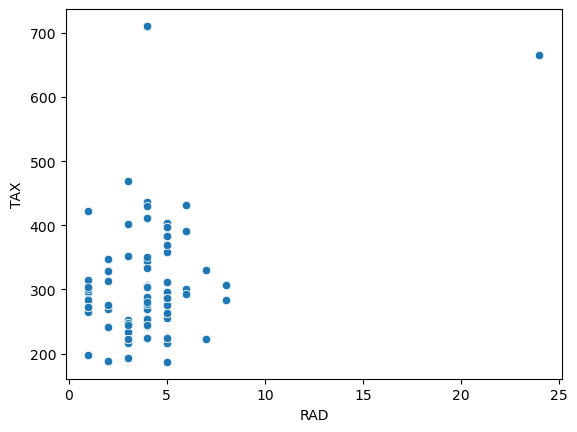

In [62]:
sns.scatterplot(data=data,x="RAD",y="TAX")

<Axes: xlabel='RAD', ylabel='TAX'>

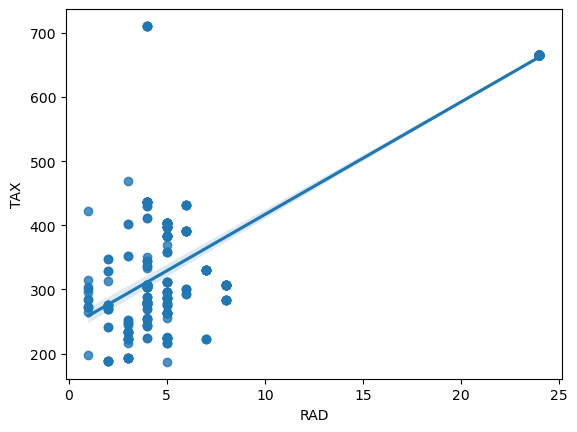

In [63]:
sns.regplot(data=data,x="RAD",y="TAX")

In [64]:
from sklearn.pipeline import Pipeline
pipeline = Pipeline(steps=[
    ('scaler', StandardScaler())  # Apply StandardScaler to features
])

In [65]:
xtrain = pipeline.fit_transform(xtrain)
xtest = pipeline.transform(xtest)

In [79]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(xtrain,ytrain)
from sklearn.model_selection import cross_val_score

In [80]:
validation=cross_val_score(model,xtrain,ytrain,scoring="neg_mean_absolute_percentage_error",cv=5)

In [81]:
validation

array([-0.21373776, -0.15721344, -0.1527825 , -0.1667379 , -0.12944131])

In [82]:
np.mean(validation)

-0.1639825821886553

In [83]:
ypred=model.predict(xtest)

In [84]:
ypred

array([20.98839564,  6.35129529, 21.19842646, 19.82532372, 30.64220937,
       18.00406838, 24.48615378, 19.76926214, 26.56379349,  3.65342497,
        7.92720051, 23.99606069, 19.23951152, 16.04636305, 17.01758724,
       22.2093867 , 21.99677068, 18.7580041 , 16.74630396, 16.9109654 ,
       21.31283536, 24.95713917, 10.88134306, 11.97479659, 32.49814572,
       18.36156907, 14.8977969 , 16.98297365, 16.41588509, 26.84645931,
       17.07603182, 31.55884366, 35.82830429,  9.89965835, 20.7455784 ,
       14.9042678 , 23.64981745, 36.32632973, 34.65091376, 14.56647329,
       21.1253529 , 24.79063641, 19.41254385, 19.97740011, 23.5905997 ,
       28.41975592, 13.90847236, 17.09606554, 36.7359154 , 13.66219039,
       20.13786832, 12.12447119, 12.94584289, 24.78511634, 12.65009282,
       17.13246311, 35.84795897,  8.98111915, 38.46180409, 18.70372278,
       20.68586805, 22.0122774 , 21.40766617, 25.7691754 , 33.2116951 ,
       41.29266374, 16.48640999, 25.59392973, 14.40035082, 14.02

## Assumption

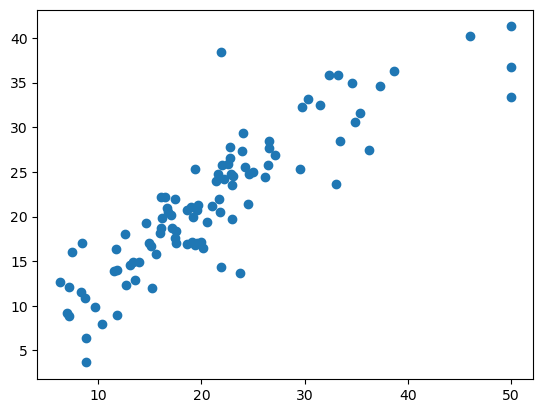

In [85]:
plt.scatter(ytest,ypred)

In [86]:
residuals=ytest-ypred
residuals

476   -4.288396
418    2.448705
29    -0.198426
315   -3.625324
199    4.257791
         ...   
503   -3.393986
174   -3.232801
85    -1.028231
252    4.309885
188   -2.468883
Name: MEDV, Length: 99, dtype: float64

/Users/sharafunneesapp/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


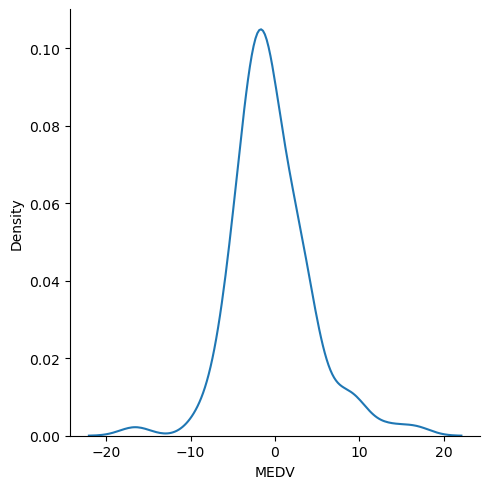

In [87]:
sns.displot(residuals,kind="kde")